# CS103 Project - Logistic Regression

The logistic regression model is a statistical model used to predict a **binary outcome**. It is a statistical method used to model the relationship between one or more independent variables and a binary dependent variable — that is, an outcome that has two possible values, such as "yes/no" or "success/failure." Unlike linear regression, which predicts a continuous value, logistic regression predicts the probability that a given input belongs to a particular category. It does this by applying the logistic (sigmoid) function to transform the output of a linear combination of the input variables into a value between 0 and 1, representing a probability. The sigmoid function is given by:

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

This makes logistic regression widely used in fields like medicine, finance, and machine learning for classification problems such as disease prediction, spam detection, and customer churn analysis. Below is the comparison between linear regression and logistic regression.

In [2]:
# Define all imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression




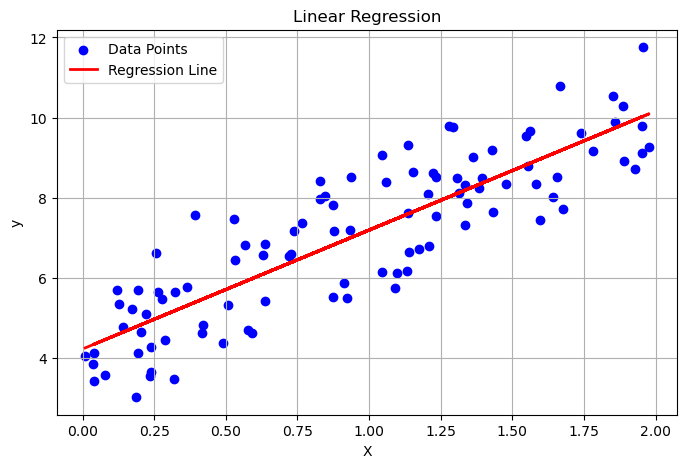

In [3]:
# Generate some sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # feature values
y = 4 + 3 * X + np.random.randn(100, 1)  # target values with some noise

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot the data points
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data Points')

# Plot the regression line
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')

# Labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()



In [4]:
# Define the sigmoid helper function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

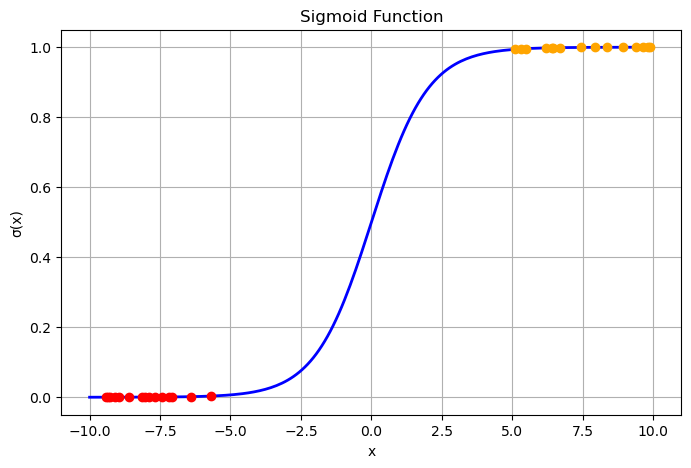

In [5]:
# Generate x values for the curve
x = np.linspace(-10, 10, 200)
y = sigmoid(x)

# Generate sample points concentrated near 0 and near 1
x_near_0 = np.random.uniform(-10, -5, 15)  # points where sigmoid ~ 0
x_middle = np.random.uniform(-2, 2, 10)    # points where sigmoid ~ 0.5
x_near_1 = np.random.uniform(5, 10, 15)    # points where sigmoid ~ 1

# Compute sigmoid values for these points
y_near_0 = sigmoid(x_near_0)
y_middle = sigmoid(x_middle)
y_near_1 = sigmoid(x_near_1)

# Plot the sigmoid curve
plt.figure(figsize=(8, 5))
plt.plot(x, y, color='blue', linewidth=2)

# Plot sample points
plt.scatter(x_near_0, y_near_0, color='red', zorder=5)
plt.scatter(x_near_1, y_near_1, color='orange', zorder=5)

# Labels and title
plt.xlabel('x')
plt.ylabel('σ(x)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.show()


 The sigmoid function is primarily used to map any real-valued number into a probability-like value between 0 and 1, making it particularly useful in fields like statistics, machine learning, and neural networks. Its smooth, S-shaped curve ensures that extreme negative inputs produce outputs close to 0, extreme positive inputs produce outputs close to 1, and values near zero produce outputs near 0.5. This property allows the sigmoid function to act as a **squashing function**, compressing unbounded input values into a finite range, which is essential for modeling probabilities and making binary classifications. In logistic regression, the sigmoid function converts the linear combination of input features into a probability that an event belongs to a particular class, while in neural networks, it helps introduce non-linearity, enabling the model to capture complex patterns in the data.

## Connection to Linear Algebra

1. **Data Representation as Matrices**  
   Represent the inputs as a matrix $X$ of size $n \times m$, where $n$ is the number of samples and $m$ is the number of features.  
   
   $$ 
   X = 
   \begin{bmatrix}
   x_{11} & x_{12} & \dots & x_{1m} \\
   x_{21} & x_{22} & \dots & x_{2m} \\
   \vdots & \vdots & \ddots & \vdots \\
   x_{n1} & x_{n2} & \dots & x_{nm}
   \end{bmatrix}
   $$
   
   Weights are represented as a vector $w$ of size $m \times 1$:
   
   $$w = 
   \begin{bmatrix}
   w_1 \\
   w_2 \\
   \vdots \\
   w_m
   \end{bmatrix}$$

2. **Linear Combination in Matrix Form**  
   Compute the linear combination of inputs and weights using matrix multiplication:
   
   $$z = X w$$
   
   Here, $z$ is an $n \times 1$ vector where each entry corresponds to a sample:  
   
   $$z_i = w_1 x_{i1} + w_2 x_{i2} + \dots + w_m x_{im}$$

3. **Gradient Descent Using Matrices**  
   The gradient of the binary cross-entropy loss can be computed efficiently using matrices:
   
   $$\nabla_w L = \frac{1}{n} X^T (\hat{y} - y)$$
   
   This allows vectorized updates of the weight vector $w$ during gradient descent.

## Example: Logistic Regression Example: Predicting Purchase of a Premium Online Subscription

### Explanation

This example simulates a **logistic regression scenario** where we are trying to predict whether a person will **purchase a premium online subscription service** (such as a fitness app, streaming platform, or software tool) based on multiple independent variables:

- **Age** (in years)  
- **Annual Income** (in dollars)  
- **Years of Professional Experience**  

Each individual's data is represented as a **row in a matrix $X$**, with an additional column of 1s to account for the bias term. The **weights vector $w$** encodes how strongly each feature influences the likelihood of purchasing the subscription. By computing the **linear combination**:

$$z = X w$$

we obtain a score for each individual. This score is then passed through the **sigmoid function** to map it into a probability between 0 and 1:

$$\hat{y}_i = \sigma(z_i) = \frac{1}{1 + e^{-z_i}}$$

Finally, the **binary outcome** $y_i$ is generated based on this probability, simulating whether a person actually purchases the subscription:

$$y_i \sim \text{Bernoulli}(\hat{y}_i)$$

The dataset can be displayed in a table to show all inputs, the linear combination $z$, predicted probabilities, and the actual binary outcome. This helps visualize how logistic regression transforms raw features into predictions for real-world decisions.

---

### Matrix Representation

Let:

$$X =
\begin{bmatrix}
1 & \text{age}_1 & \text{income}_1 & \text{experience}_1 \\
1 & \text{age}_2 & \text{income}_2 & \text{experience}_2 \\
\vdots & \vdots & \vdots & \vdots \\
1 & \text{age}_n & \text{income}_n & \text{experience}_n
\end{bmatrix}_{n \times 4}, 
\quad
w =
\begin{bmatrix}
w_0 \\ w_{\text{age}} \\ w_{\text{income}} \\ w_{\text{experience}}
\end{bmatrix}_{4 \times 1}$$

1. **Linear combination (score for each individual):**

$$z_i = w_0 + w_{\text{age}} \cdot \text{age}_i + w_{\text{income}} \cdot \text{income}_i + w_{\text{experience}} \cdot \text{experience}_i$$

2. **Predicted probability of purchasing the premium subscription:**

$$\hat{y}_i = \sigma(z_i) = \frac{1}{1 + e^{-z_i}}$$

3. **Binary outcome (purchase or not):**

$$y_i \sim \text{Bernoulli}(\hat{y}_i)$$

Where $y_i = 1$ indicates the person purchased the subscription, and $y_i = 0$ indicates they did not.

---

This Markdown cell now fully explains the example, the real-life context, and the matrix formulation used in logistic regression.

In [6]:
# Generate data to create a clear S-curve pattern with variable income and experience
np.random.seed(42)
n_samples = 50

# Create age values that span across the sigmoid transition zone
# This ensures we get points both near 0 and near 1, with transition in between
age_low = np.random.uniform(20, 35, 15)     # Ages that will likely give low probabilities
age_mid = np.random.uniform(35, 50, 20)     # Ages in transition zone
age_high = np.random.uniform(50, 65, 15)    # Ages that will likely give high probabilities
age = np.concatenate([age_low, age_mid, age_high])

# Variable income and experience - but with controlled ranges to maintain S-curve
income = np.random.uniform(30000, 80000, n_samples)     # Variable income
experience = np.random.uniform(5, 30, n_samples)        # Variable experience

# Weights designed to create clear S-curve with age as PRIMARY factor
# Income and experience have smaller coefficients to add variation without disrupting S-curve
w0 = -12        # bias - keeps the curve centered
w_age = 0.25    # STRONG age coefficient (main driver of S-curve)
w_income = 0.00002  # small income effect (adds some variation)
w_experience = 0.03  # small experience effect (adds some variation)
w = np.array([w0, w_age, w_income, w_experience]).reshape(-1,1)

# Represent it as a matrix
X = np.column_stack((np.ones(n_samples), age, income, experience)) # n x (m+1)

# Compute linear combination and predicted probabilities
z_matrix = X @ w
y_prob = sigmoid(z_matrix)

# Generate binary dependent variable using logistic decision rule
y = (y_prob.flatten() >= 0.5).astype(int)

df = pd.DataFrame({
    'Age': age,
    'Income': income,
    'Experience': experience,
    'Linear Combination (z)': z_matrix.flatten(),
    'Predicted Probability': y_prob.flatten(),
    'Purchased (y)': y
})

# Sort by age for better visualization
df = df.sort_values('Age').reset_index(drop=True)

pd.set_option('display.max_rows', None)
display(df)

,Age,Income,Experience,Linear Combination (z),Predicted Probability,Purchased (y)
0,20.308767,49433.864484,12.243786,-5.566817,0.003808,0
1,20.871254,34424.625103,15.259573,-5.635907,0.003555,0
2,22.339918,76093.711751,11.232306,-4.556177,0.010393,0
3,22.340280,59894.998941,27.689162,-4.386355,0.012293,0
4,22.727375,44046.725484,20.835094,-4.812169,0.008065,0
5,23.185087,47837.666335,25.203009,-4.490885,0.011086,0
6,25.618102,78479.231388,5.785730,-3.852318,0.020789,0
7,28.979877,74741.367521,17.714267,-2.728775,0.061297,0
8,29.016725,32261.364446,10.719954,-3.778993,0.022335,0
9,30.621089,46266.516538,6.924498,-3.211663,0.038729,0


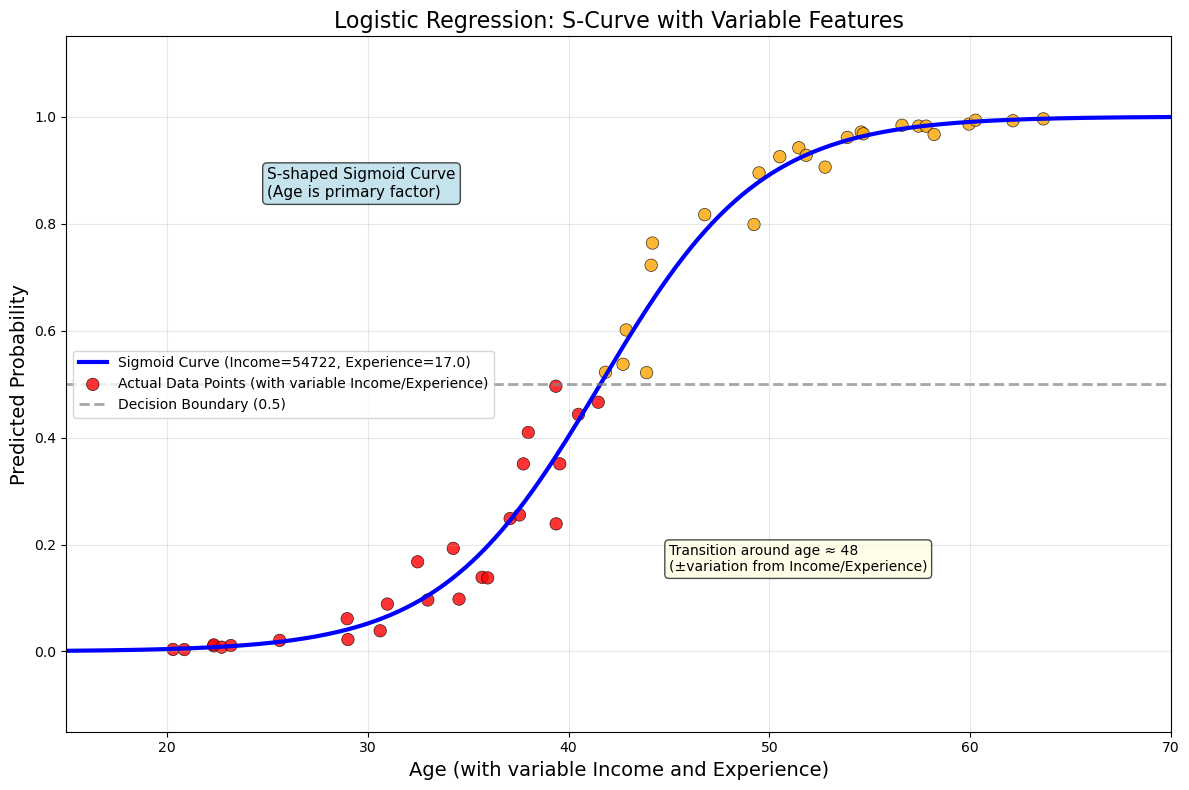

=== LOGISTIC REGRESSION SUMMARY ===
Age coefficient: 0.250 (primary driver)
Income coefficient: 0.000020 (adds variation)
Experience coefficient: 0.030 (adds variation)

Decision boundary at probability = 0.5
Transition point (z=0) occurs around age = 48.0

Variable ranges:
  Age: 20.3 - 63.6 years
  Income: $30276 - $79344
  Experience: 5.2 - 29.3 years

Outcomes:
  No Purchase (y=0): 26 people
  Purchase (y=1): 24 people
  Probability range: 0.004 to 0.996

=== FEATURE IMPACT EXAMPLES ===
Highest probability (0.996):
  Age: 63.6, Income: $58064, Experience: 12.5
Lowest probability (0.004):
  Age: 20.9, Income: $34425, Experience: 15.3


In [7]:
# Create the S-curve plot with variable income and experience
# Use mean values for the main curve, but show actual data points with their real values
income_mean = df['Income'].mean()
experience_mean = df['Experience'].mean()

# Create a wide age range to show the full S-curve (using mean income/experience)
age_range = np.linspace(15, 70, 300)  # More points for smoother curve
X_plot = np.column_stack((
    np.ones(300),
    age_range,
    np.full(300, income_mean),
    np.full(300, experience_mean)
))

# Use the same weights as in data generation
w_vector = np.array([w0, w_age, w_income, w_experience]).reshape(-1,1)
z_plot = X_plot @ w_vector
prob_plot = sigmoid(z_plot)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot the smooth S-curve (based on mean income/experience)
plt.plot(age_range, prob_plot, color='blue', linewidth=3, 
         label=f'Sigmoid Curve (Income={income_mean:.0f}, Experience={experience_mean:.1f})')

# Plot actual data points with their individual probabilities
# Color points by their actual outcome, but position them at their actual probability
colors = ['red' if y_val == 0 else 'orange' for y_val in df['Purchased (y)']]
scatter = plt.scatter(df['Age'], df['Predicted Probability'], c=colors, s=80, alpha=0.8, 
                     edgecolors='black', linewidth=0.5, 
                     label='Actual Data Points (with variable Income/Experience)')

# Add a horizontal line at 0.5 to show the decision boundary
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7, linewidth=2, 
           label='Decision Boundary (0.5)')

# Formatting
plt.xlabel('Age (with variable Income and Experience)', fontsize=14)
plt.ylabel('Predicted Probability', fontsize=14)
plt.title('Logistic Regression: S-Curve with Variable Features', fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10, loc='center left')
plt.ylim(-0.15, 1.15)
plt.xlim(15, 70)

# Add text annotations
plt.text(25, 0.85, 'S-shaped Sigmoid Curve\n(Age is primary factor)', fontsize=11, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))
plt.text(45, 0.15, f'Transition around age ≈ {-w0/w_age:.0f}\n(±variation from Income/Experience)', 
         fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.7))

plt.tight_layout()
plt.show()

# Print detailed summary statistics
print(f"=== LOGISTIC REGRESSION SUMMARY ===")
print(f"Age coefficient: {w_age:.3f} (primary driver)")
print(f"Income coefficient: {w_income:.6f} (adds variation)")
print(f"Experience coefficient: {w_experience:.3f} (adds variation)")
print(f"\nDecision boundary at probability = 0.5")
print(f"Transition point (z=0) occurs around age = {-w0/w_age:.1f}")
print(f"\nVariable ranges:")
print(f"  Age: {df['Age'].min():.1f} - {df['Age'].max():.1f} years")
print(f"  Income: ${df['Income'].min():.0f} - ${df['Income'].max():.0f}")
print(f"  Experience: {df['Experience'].min():.1f} - {df['Experience'].max():.1f} years")
print(f"\nOutcomes:")
print(f"  No Purchase (y=0): {sum(df['Purchased (y)'] == 0)} people")
print(f"  Purchase (y=1): {sum(df['Purchased (y)'] == 1)} people")
print(f"  Probability range: {df['Predicted Probability'].min():.3f} to {df['Predicted Probability'].max():.3f}")

# Show how income/experience affect individual predictions
print(f"\n=== FEATURE IMPACT EXAMPLES ===")
high_prob_idx = df['Predicted Probability'].idxmax()
low_prob_idx = df['Predicted Probability'].idxmin()
print(f"Highest probability ({df.loc[high_prob_idx, 'Predicted Probability']:.3f}):")
print(f"  Age: {df.loc[high_prob_idx, 'Age']:.1f}, Income: ${df.loc[high_prob_idx, 'Income']:.0f}, Experience: {df.loc[high_prob_idx, 'Experience']:.1f}")
print(f"Lowest probability ({df.loc[low_prob_idx, 'Predicted Probability']:.3f}):")
print(f"  Age: {df.loc[low_prob_idx, 'Age']:.1f}, Income: ${df.loc[low_prob_idx, 'Income']:.0f}, Experience: {df.loc[low_prob_idx, 'Experience']:.1f}")

### Distinctions Between the Three Models

Here is a summary of the key differences between the three models that will be compared:

*   **Model 1 (Base Model - Age Only):**
    *   **Predictor:** Uses only **Age**.
    *   **Assumption:** Income and experience are held constant at their average values and do not affect the outcome.
    *   **Purpose:** Establishes a simple baseline to see how much predictive power age alone holds. The resulting S-curve is perfectly smooth as it depends on only one variable.

*   **Model 2 (Intermediate Model - Age + Income):**
    *   **Predictors:** Uses **Age** and **Income**.
    *   **Assumption:** Experience is held constant, but individual income is now allowed to vary.
    *   **Purpose:** Introduces more complexity to see if income improves predictive accuracy. The data points will now be scattered vertically around the main S-curve, as income adds variability to the predicted probability for individuals of the same age.

*   **Model 3 (Full Model - All Features):**
    *   **Predictors:** Uses **Age**, **Income**, and **Experience**.
    *   **Assumption:** All features are variable and contribute to the outcome.
    *   **Purpose:** Represents the most comprehensive model, assessing the combined impact of all three features. This model is expected to have the highest accuracy if all features are relevant, as it captures the most detailed information about each individual.

## Model Comparison: Feature Selection Impact

Now let's compare three different logistic regression models to understand how adding more features affects the predictions:

1. **Model 1**: Age only (keeping income and experience constant)
2.  **Model 2**: Age + Income (keeping experience constant)  
3.  **Model 3**: Age + Income + Experience (all features)

This comparison will help us understand:
- How each feature contributes to the prediction
- How model complexity affects the decision boundary
- The trade-off between simplicity and accuracy

### Model 1: Age Only - Matrix Formulation

In this model, we use **only age** as a predictor while keeping income and experience **constant** at their mean values.

**Matrix Setup:**
$$X_1 = \begin{bmatrix}
1 & \text{age}_1 & \bar{\text{income}} & \bar{\text{experience}} \\
1 & \text{age}_2 & \bar{\text{income}} & \bar{\text{experience}} \\
\vdots & \vdots & \vdots & \vdots \\
1 & \text{age}_n & \bar{\text{income}} & \bar{\text{experience}}
\end{bmatrix}_{n \times 4}$$

**Weight Vector:**
$$w_1 = \begin{bmatrix}
w_0 \\ w_{\text{age}} \\ 0 \\ 0
\end{bmatrix}_{4 \times 1}$$

**Linear Combination:**
$$z_1 = X_1 w_1 = w_0 + w_{\text{age}} \cdot \text{age}_i + 0 \cdot \bar{\text{income}} + 0 \cdot \bar{\text{experience}}$$

**Simplified:**
$$z_1 = w_0 + w_{\text{age}} \cdot \text{age}_i$$

**Probability:**
$$P(\text{purchase}_i) = \sigma(z_1) = \frac{1}{1 + e^{-(w_0 + w_{\text{age}} \cdot \text{age}_i)}}$$

This creates a **pure age-based model** where only age determines the purchase probability.

In [8]:
# MODEL 1: Age Only (Income and Experience held constant)
print("=== MODEL 1: AGE ONLY ===")

# Use the same data but fix income and experience at their mean values
income_constant = df['Income'].mean()
experience_constant = df['Experience'].mean()

# Create matrix with age + constant income/experience
X1 = np.column_stack((
    np.ones(n_samples),                    # bias term
    df['Age'],                             # age (variable)
    np.full(n_samples, income_constant),   # income (constant)
    np.full(n_samples, experience_constant) # experience (constant)
))

# Simple weights - only age matters, others are zero
w1_age = 0.25
w1_income = 0.0     # No effect
w1_experience = 0.0 # No effect (held constant)
w1_bias = -12

w1 = np.array([w1_bias, w1_age, w1_income, w1_experience]).reshape(-1,1)

# Calculate probabilities and predictions
z1 = X1 @ w1
prob1 = sigmoid(z1)
pred1 = (prob1.flatten() >= 0.5).astype(int)

print(f"Age coefficient: {w1_age}")
print(f"Income coefficient: {w1_income} (held constant at ${income_constant:.0f})")
print(f"Experience coefficient: {w1_experience} (held constant at {experience_constant:.1f} years)")
print(f"Transition age: {-w1_bias/w1_age:.1f} years")
print(f"Accuracy: {np.mean(pred1 == df['Purchased (y)']):.3f}")
print(f"Predicted purchases: {sum(pred1)}/{len(pred1)}")
print()

=== MODEL 1: AGE ONLY ===
Age coefficient: 0.25
Income coefficient: 0.0 (held constant at $54722)
Experience coefficient: 0.0 (held constant at 17.0 years)
Transition age: 48.0 years
Accuracy: 0.860
Predicted purchases: 17/50



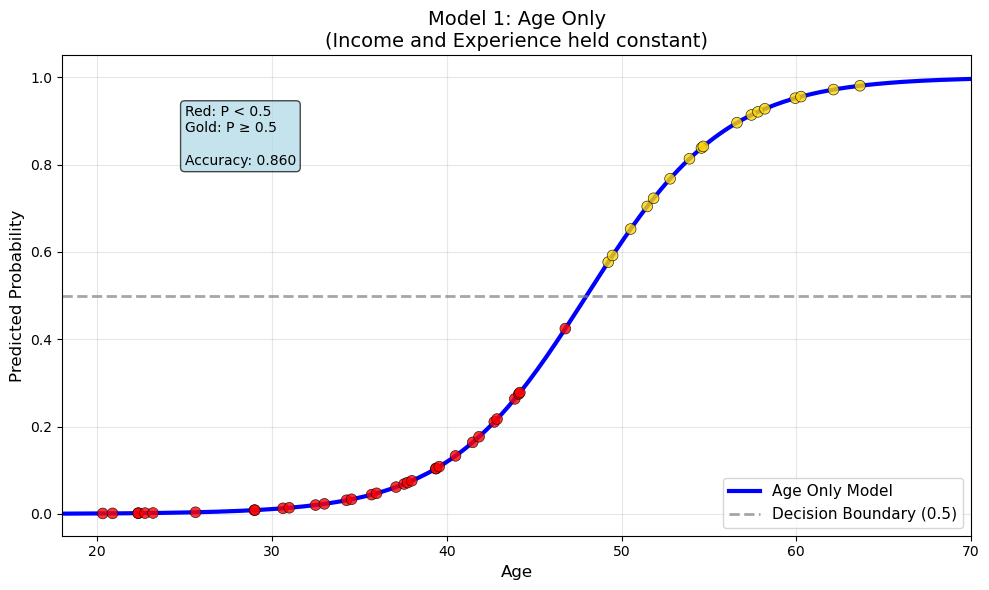

In [9]:
# Model 1 Visualization: Age Only
plt.figure(figsize=(10, 6))

# Create age range for plotting curves
age_range = np.linspace(18, 70, 200)

# Model 1: Age only curve
X_plot1 = np.column_stack((
    np.ones(200),
    age_range,
    np.full(200, income_constant),
    np.full(200, experience_constant)
))
prob_plot1 = sigmoid(X_plot1 @ w1)

plt.plot(age_range, prob_plot1, 'b-', linewidth=3, label='Age Only Model')

# Color points based on their ACTUAL PROBABILITY (not outcome)
# Red for probabilities < 0.5, Yellow for probabilities >= 0.5
colors1 = ['red' if p < 0.5 else 'gold' for p in prob1.flatten()]
plt.scatter(df['Age'], prob1.flatten(), c=colors1, alpha=0.8, s=60, 
           edgecolors='black', linewidth=0.5, zorder=5)

# Decision boundary
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7, linewidth=2, 
           label='Decision Boundary (0.5)')

plt.xlabel('Age', fontsize=12)
plt.ylabel('Predicted Probability', fontsize=12)
plt.title('Model 1: Age Only\n(Income and Experience held constant)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.ylim(-0.05, 1.05)
plt.xlim(18, 70)

# Add annotation
plt.text(25, 0.8, f'Red: P < 0.5\nGold: P ≥ 0.5\n\nAccuracy: {np.mean(pred1 == df["Purchased (y)"]):.3f}', 
         fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

plt.tight_layout()
plt.show()

### Gradient Descent Analysis for Model 1 (Age)

Gradient descent is an iterative optimization algorithm used to find the minimum of a function. In logistic regression, we use it to find the optimal weights ($w$) that minimize the **cost function**, which is typically the **Binary Cross-Entropy Loss**.

The process works as follows:
1.  **Initialize Weights**: Start with random values for the weight vector $w$.
2.  **Compute Gradient**: Calculate the gradient of the cost function with respect to the weights. The gradient points in the direction of the steepest ascent.
    $$ \nabla_w L = \frac{1}{n} X^T (\sigma(Xw) - y) $$
3.  **Update Weights**: Move the weights in the opposite direction of the gradient to descend towards the minimum. The size of this step is controlled by the **learning rate** ($\alpha$).
    $$ w := w - \alpha \nabla_w L $$
4.  **Repeat**: Repeat steps 2 and 3 for a fixed number of iterations or until the cost converges to a minimum.

The following visualization demonstrates this process on a 2D cost surface, showing how the algorithm iteratively finds the weights that best fit the data.

=== GRADIENT DESCENT RESULTS ===
Initial Cost: 2.6367
Final Cost: 0.7045
Optimal Weights (w0, w_age): [0.26081021 0.00320777]


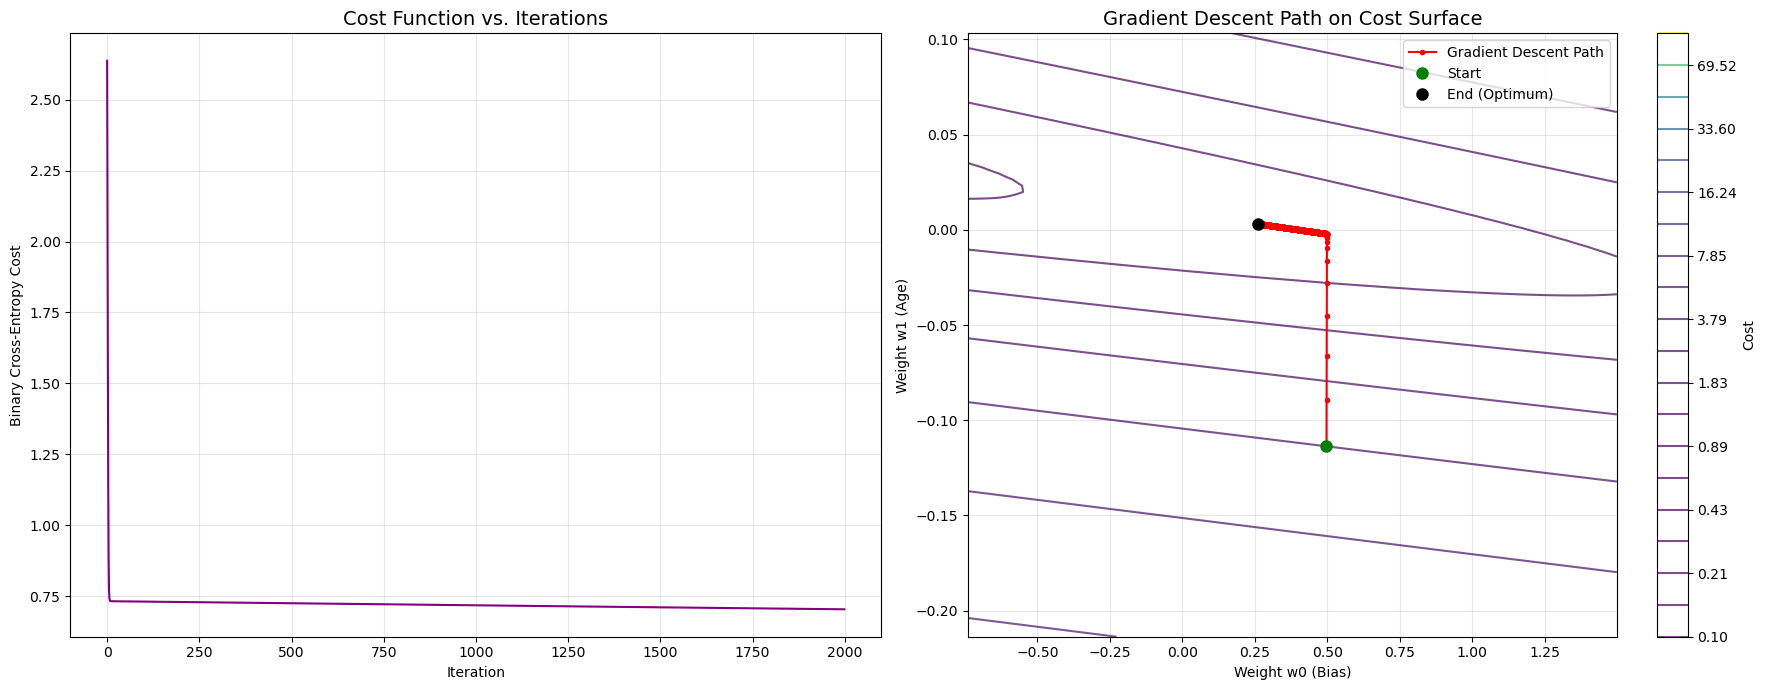

In [10]:
# Visualize Gradient Descent for Logistic Regression

# Use a simplified dataset (Age vs. Purchased) from the subscription example
# This allows us to visualize the cost surface in 3D (w0, w_age, cost)
X_gd = df[['Age']].values
y_gd = df[['Purchased (y)']].values

# Add bias term (column of 1s)
X_b = np.c_[np.ones((len(X_gd), 1)), X_gd]

# --- Gradient Descent Implementation ---
learning_rate = 0.001
n_iterations = 2000

# Initialize weights randomly
np.random.seed(42)
w_gd = np.random.randn(2, 1)

# Store history for plotting
w_history = []
cost_history = []

def calculate_cost(X, y, w):
    n = len(y)
    y_pred = sigmoid(X @ w)
    cost = -1/n * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

for iteration in range(n_iterations):
    y_pred = sigmoid(X_b @ w_gd)
    gradient = 1/len(y_gd) * X_b.T @ (y_pred - y_gd)
    w_gd = w_gd - learning_rate * gradient
    
    cost = calculate_cost(X_b, y_gd, w_gd)
    w_history.append(w_gd.flatten())
    cost_history.append(cost)

w_history = np.array(w_history)

print("=== GRADIENT DESCENT RESULTS ===")
print(f"Initial Cost: {cost_history[0]:.4f}")
print(f"Final Cost: {cost_history[-1]:.4f}")
print(f"Optimal Weights (w0, w_age): {w_gd.flatten()}")

# --- Visualization ---
fig = plt.figure(figsize=(18, 7))

# 1. Cost vs. Iterations
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(range(n_iterations), cost_history, color='purple')
ax1.set_title('Cost Function vs. Iterations', fontsize=14)
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Binary Cross-Entropy Cost')
ax1.grid(True, alpha=0.3)

# 2. Contour Plot of Cost Surface and GD Path
ax2 = fig.add_subplot(1, 2, 2)

# Create a grid of weights to compute cost surface
w0_vals = np.linspace(w_history[:, 0].min() - 1, w_history[:, 0].max() + 1, 100)
w1_vals = np.linspace(w_history[:, 1].min() - 0.1, w_history[:, 1].max() + 0.1, 100)
W0, W1 = np.meshgrid(w0_vals, w1_vals)

# Calculate cost for each point on the grid
costs = np.zeros(W0.shape)
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        w_ij = np.array([[W0[i, j]], [W1[i, j]]])
        costs[i, j] = calculate_cost(X_b, y_gd, w_ij)

# Plot contour
contour = ax2.contour(W0, W1, costs, levels=np.logspace(-1, 2, 20), cmap='viridis', alpha=0.7)
plt.colorbar(contour, ax=ax2, label='Cost')

# Plot the path of gradient descent
ax2.plot(w_history[:, 0], w_history[:, 1], 'r-o', markersize=3, 
         linewidth=1.5, label='Gradient Descent Path')
ax2.plot(w_history[0, 0], w_history[0, 1], 'go', markersize=8, label='Start')
ax2.plot(w_history[-1, 0], w_history[-1, 1], 'ko', markersize=8, label='End (Optimum)')

ax2.set_title('Gradient Descent Path on Cost Surface', fontsize=14)
ax2.set_xlabel('Weight w0 (Bias)')
ax2.set_ylabel('Weight w1 (Age)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Model 2: Age + Income - Matrix Formulation

In this model, we use **age and income** as predictors while keeping experience **constant** at its mean value.

**Matrix Setup:**
$$X_2 = \begin{bmatrix}
1 & \text{age}_1 & \text{income}_1 & \bar{\text{experience}} \\
1 & \text{age}_2 & \text{income}_2 & \bar{\text{experience}} \\
\vdots & \vdots & \vdots & \vdots \\
1 & \text{age}_n & \text{income}_n & \bar{\text{experience}}
\end{bmatrix}_{n \times 4}$$

**Weight Vector:**
$$w_2 = \begin{bmatrix}
w_0 \\ w_{\text{age}} \\ w_{\text{income}} \\ 0
\end{bmatrix}_{4 \times 1}$$

**Linear Combination:**
$$z_2 = X_2 w_2 = w_0 + w_{\text{age}} \cdot \text{age}_i + w_{\text{income}} \cdot \text{income}_i + 0 \cdot \bar{\text{experience}}$$

**Simplified:**
$$z_2 = w_0 + w_{\text{age}} \cdot \text{age}_i + w_{\text{income}} \cdot \text{income}_i$$

**Probability:**
$$P(\text{purchase}_i) = \sigma(z_2) = \frac{1}{1 + e^{-(w_0 + w_{\text{age}} \cdot \text{age}_i + w_{\text{income}} \cdot \text{income}_i)}}$$

This creates an **age-income interaction model** where both age and individual income levels affect the purchase probability, adding more nuanced predictions than the age-only model.

In [11]:
# MODEL 2: Age + Income (Experience held constant)
print("=== MODEL 2: AGE + INCOME ===")

# Create matrix with age + income (variable) + constant experience
X2 = np.column_stack((
    np.ones(n_samples),                    # bias term
    df['Age'],                             # age (variable)
    df['Income'],                          # income (variable)
    np.full(n_samples, experience_constant) # experience (constant)
))

# Weights for age and income, experience set to zero
w2_age = 0.20       # Slightly reduced since income also contributes
w2_income = 0.00003 # Income effect
w2_experience = 0.0 # No effect (held constant)
w2_bias = -12

w2 = np.array([w2_bias, w2_age, w2_income, w2_experience]).reshape(-1,1)

# Calculate probabilities and predictions
z2 = X2 @ w2
prob2 = sigmoid(z2)
pred2 = (prob2.flatten() >= 0.5).astype(int)

print(f"Age coefficient: {w2_age}")
print(f"Income coefficient: {w2_income}")
print(f"Experience coefficient: {w2_experience} (held constant at {experience_constant:.1f} years)")
print(f"Base transition age (at mean income): {-w2_bias/w2_age:.1f} years")
print(f"Income effect: +$10K income ≈ {10000 * w2_income / w2_age:.1f} years younger")
print(f"Accuracy: {np.mean(pred2 == df['Purchased (y)']):.3f}")
print(f"Predicted purchases: {sum(pred2)}/{len(pred2)}")
print()

=== MODEL 2: AGE + INCOME ===
Age coefficient: 0.2
Income coefficient: 3e-05
Experience coefficient: 0.0 (held constant at 17.0 years)
Base transition age (at mean income): 60.0 years
Income effect: +$10K income ≈ 1.5 years younger
Accuracy: 0.780
Predicted purchases: 13/50



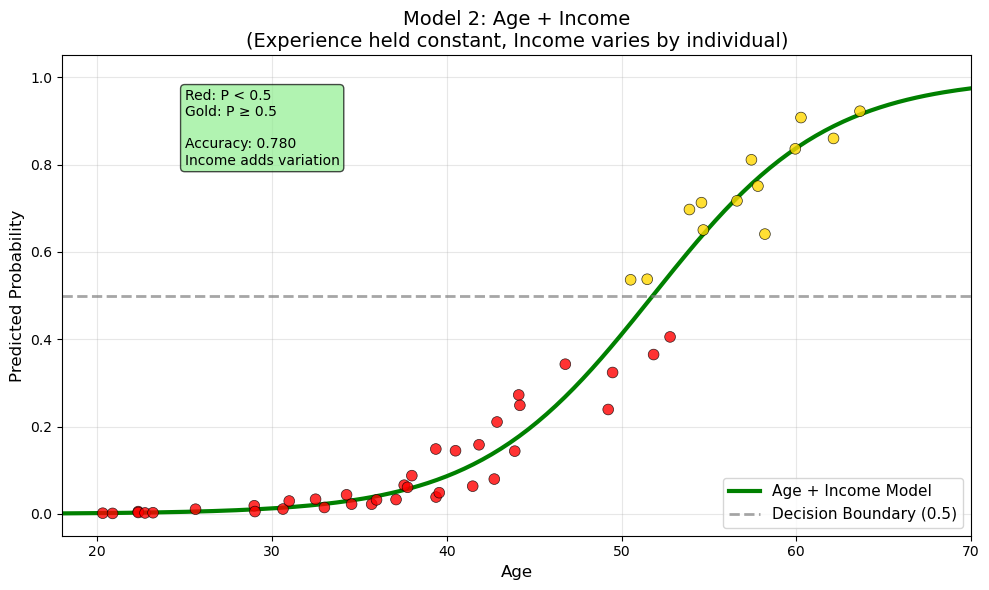

In [12]:
# Model 2 Visualization: Age + Income
plt.figure(figsize=(10, 6))

# Model 2: Age + Income curve (using mean income for the curve)
X_plot2 = np.column_stack((
    np.ones(200),
    age_range,
    np.full(200, df['Income'].mean()),  # Use mean income for the curve
    np.full(200, experience_constant)
))
prob_plot2 = sigmoid(X_plot2 @ w2)

plt.plot(age_range, prob_plot2, 'g-', linewidth=3, label='Age + Income Model')

# Color points based on their ACTUAL PROBABILITY (not outcome)
# Red for probabilities < 0.5, Yellow for probabilities >= 0.5
colors2 = ['red' if p < 0.5 else 'gold' for p in prob2.flatten()]
plt.scatter(df['Age'], prob2.flatten(), c=colors2, alpha=0.8, s=60, 
           edgecolors='black', linewidth=0.5, zorder=5)

# Decision boundary
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7, linewidth=2, 
           label='Decision Boundary (0.5)')

plt.xlabel('Age', fontsize=12)
plt.ylabel('Predicted Probability', fontsize=12)
plt.title('Model 2: Age + Income\n(Experience held constant, Income varies by individual)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.ylim(-0.05, 1.05)
plt.xlim(18, 70)

# Add annotation
plt.text(25, 0.8, f'Red: P < 0.5\nGold: P ≥ 0.5\n\nAccuracy: {np.mean(pred2 == df["Purchased (y)"]):.3f}\nIncome adds variation', 
         fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7))

plt.tight_layout()
plt.show()

### Gradient Descent Analysis for Model 2 (Age + Income)

For Model 2, we are optimizing three weights: $w_0$ (bias), $w_{\text{age}}$, and $w_{\text{income}}$. Visualizing a 3D cost surface is complex. Instead, we can analyze the gradient descent process by:

1.  **Plotting the Cost Over Iterations**: This shows if the model is learning and converging to a minimum cost.
2.  **Plotting the Weight History**: This shows how each individual weight ($w_0$, $w_{\text{age}}$, $w_{\text{income}}$) changes over the iterations to reach its optimal value.

This approach allows us to confirm that the optimization process is working correctly even when we cannot easily visualize the entire cost landscape.

The gradient descent update rule relies on the following matrix operations:

**1. Data Matrix ($X_{\text{model2}}$)**
The input matrix includes a bias column, age, and income.

$$
X_{\text{model2}} =
\begin{bmatrix}
1 & \text{age}_1 & \text{income}_1 \\
1 & \text{age}_2 & \text{income}_2 \\
\vdots & \vdots & \vdots \\
1 & \text{age}_n & \text{income}_n
\end{bmatrix}_{n \times 3}
$$

**2. Weight Vector ($w_{\text{model2}}$)**
The weight vector contains the coefficients for the bias, age, and income.

$$
w_{\text{model2}} =
\begin{bmatrix}
w_0 \\
w_{\text{age}} \\
w_{\text{income}}
\end{bmatrix}_{3 \times 1}
$$

**3. Gradient Calculation**
The gradient of the cost function is computed as:

$$ \nabla_w L = \frac{1}{n} X_{\text{model2}}^T (\sigma(X_{\text{model2}}w_{\text{model2}}) - y) $$

**4. Weight Update Rule**
The weights are updated iteratively using the learning rate $\alpha$:

$$ w_{\text{model2}} := w_{\text{model2}} - \alpha \nabla_w L $$

=== GRADIENT DESCENT RESULTS (MODEL 2) ===
Final Cost: 0.1137
Optimal Weights (w_bias, w_age, w_income): [-0.1082322   5.1269806   0.30243829]


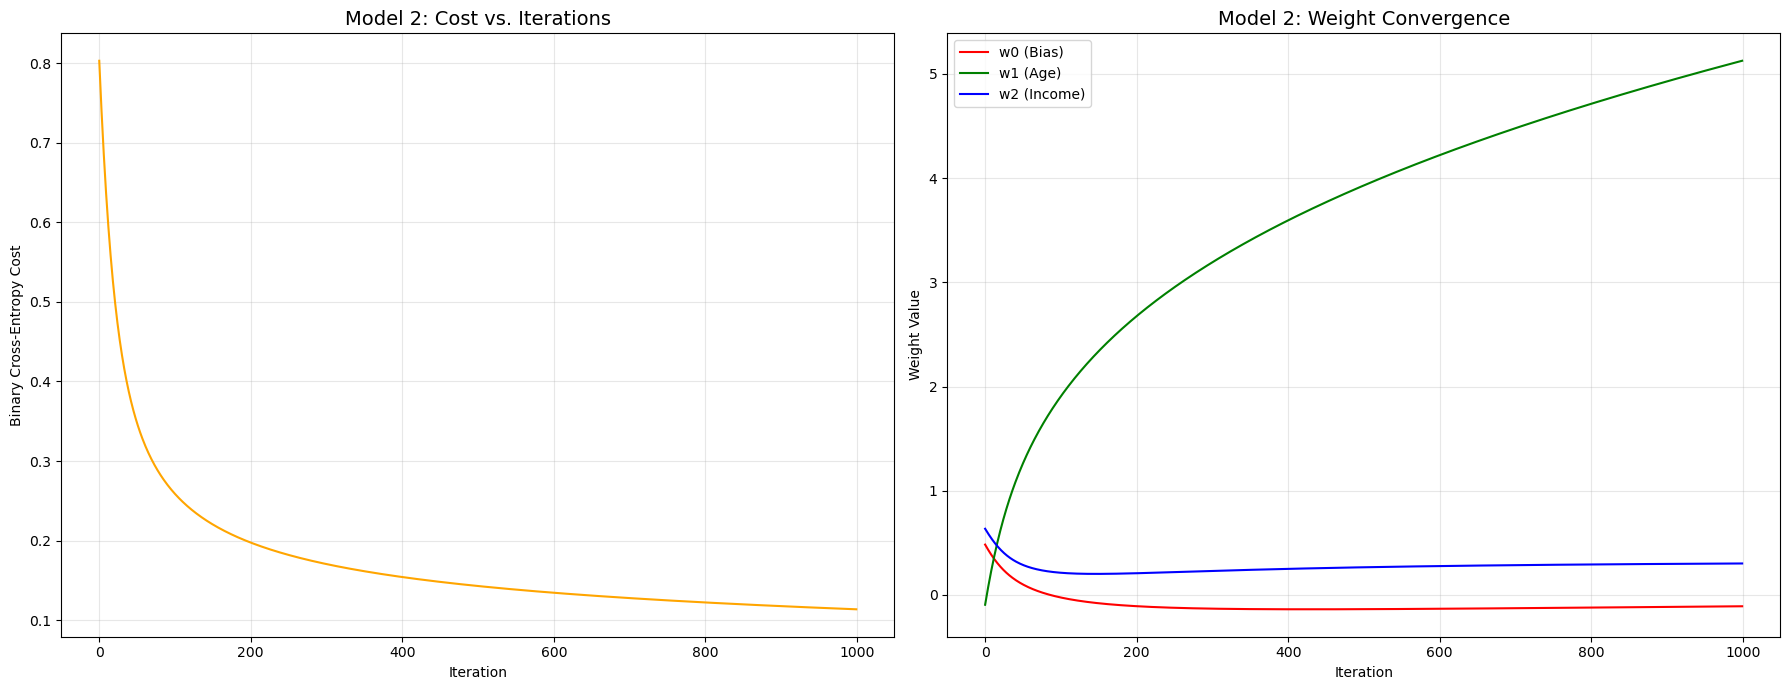

In [13]:
# Visualize Gradient Descent for Model 2 (Age + Income)

# Prepare data: Standardize features for better gradient descent performance
scaler = StandardScaler()
X_model2_scaled = scaler.fit_transform(df[['Age', 'Income']])

# Add bias term
X_b_m2 = np.c_[np.ones((len(X_model2_scaled), 1)), X_model2_scaled]
y_m2 = df[['Purchased (y)']].values

# --- Gradient Descent Implementation ---
learning_rate_m2 = 0.1  # A larger learning rate can be used with standardized data
n_iterations_m2 = 1000

# Initialize weights
np.random.seed(42)
w_m2 = np.random.randn(3, 1)

# Store history
w_history_m2 = []
cost_history_m2 = []

for iteration in range(n_iterations_m2):
    y_pred = sigmoid(X_b_m2 @ w_m2)
    gradient = 1/len(y_m2) * X_b_m2.T @ (y_pred - y_m2)
    w_m2 = w_m2 - learning_rate_m2 * gradient
    
    cost = calculate_cost(X_b_m2, y_m2, w_m2)
    w_history_m2.append(w_m2.flatten())
    cost_history_m2.append(cost)

w_history_m2 = np.array(w_history_m2)

print("=== GRADIENT DESCENT RESULTS (MODEL 2) ===")
print(f"Final Cost: {cost_history_m2[-1]:.4f}")
print(f"Optimal Weights (w_bias, w_age, w_income): {w_m2.flatten()}")

# --- Visualization ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# 1. Cost vs. Iterations
ax1.plot(range(n_iterations_m2), cost_history_m2, color='orange')
ax1.set_title('Model 2: Cost vs. Iterations', fontsize=14)
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Binary Cross-Entropy Cost')
ax1.grid(True, alpha=0.3)

# 2. Weight Convergence
ax2.plot(w_history_m2[:, 0], label='w0 (Bias)', color='red')
ax2.plot(w_history_m2[:, 1], label='w1 (Age)', color='green')
ax2.plot(w_history_m2[:, 2], label='w2 (Income)', color='blue')
ax2.set_title('Model 2: Weight Convergence', fontsize=14)
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Weight Value')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Model 3: All Features - Matrix Formulation

In this model, we use **all features** (age, income, and experience) as predictors for the most comprehensive model.

**Matrix Setup:**
$$X_3 = \begin{bmatrix}
1 & \text{age}_1 & \text{income}_1 & \text{experience}_1 \\
1 & \text{age}_2 & \text{income}_2 & \text{experience}_2 \\
\vdots & \vdots & \vdots & \vdots \\
1 & \text{age}_n & \text{income}_n & \text{experience}_n
\end{bmatrix}_{n \times 4}$$

**Weight Vector:**
$$w_3 = \begin{bmatrix}
w_0 \\ w_{\text{age}} \\ w_{\text{income}} \\ w_{\text{experience}}
\end{bmatrix}_{4 \times 1}$$

**Linear Combination:**
$$z_3 = X_3 w_3 = w_0 + w_{\text{age}} \cdot \text{age}_i + w_{\text{income}} \cdot \text{income}_i + w_{\text{experience}} \cdot \text{experience}_i$$

**Probability:**
$$P(\text{purchase}_i) = \sigma(z_3) = \frac{1}{1 + e^{-(w_0 + w_{\text{age}} \cdot \text{age}_i + w_{\text{income}} \cdot \text{income}_i + w_{\text{experience}} \cdot \text{experience}_i)}}$$

**Feature Interactions:**
This full model captures the **combined effect** of all three features:
- **Age**: Primary life stage factor
- **Income**: Financial capacity factor  
- **Experience**: Professional development factor

The model can capture complex interactions where, for example, a younger person with high income and experience might have similar purchase probability as an older person with moderate income and experience.

In [14]:
# MODEL 3: Age + Income + Experience (All features)
print("=== MODEL 3: ALL FEATURES ===")

# Use original matrix with all features
X3 = X  # This is the original matrix from earlier

# Use original weights (all features contribute)
w3_age = 0.18           # Reduced as other features also contribute
w3_income = 0.00002     # Income effect
w3_experience = 0.04    # Experience effect
w3_bias = -12

w3 = np.array([w3_bias, w3_age, w3_income, w3_experience]).reshape(-1,1)

# Calculate probabilities and predictions
z3 = X3 @ w3
prob3 = sigmoid(z3)
pred3 = (prob3.flatten() >= 0.5).astype(int)

print(f"Age coefficient: {w3_age}")
print(f"Income coefficient: {w3_income}")
print(f"Experience coefficient: {w3_experience}")
print(f"Base transition age: {-w3_bias/w3_age:.1f} years")
print(f"Income effect: +$10K income ≈ {10000 * w3_income / w3_age:.1f} years younger")
print(f"Experience effect: +10 years exp ≈ {10 * w3_experience / w3_age:.1f} years younger")
print(f"Accuracy: {np.mean(pred3 == df['Purchased (y)']):.3f}")
print(f"Predicted purchases: {sum(pred3)}/{len(pred3)}")
print()



=== MODEL 3: ALL FEATURES ===
Age coefficient: 0.18
Income coefficient: 2e-05
Experience coefficient: 0.04
Base transition age: 66.7 years
Income effect: +$10K income ≈ 1.1 years younger
Experience effect: +10 years exp ≈ 2.2 years younger
Accuracy: 0.660
Predicted purchases: 7/50



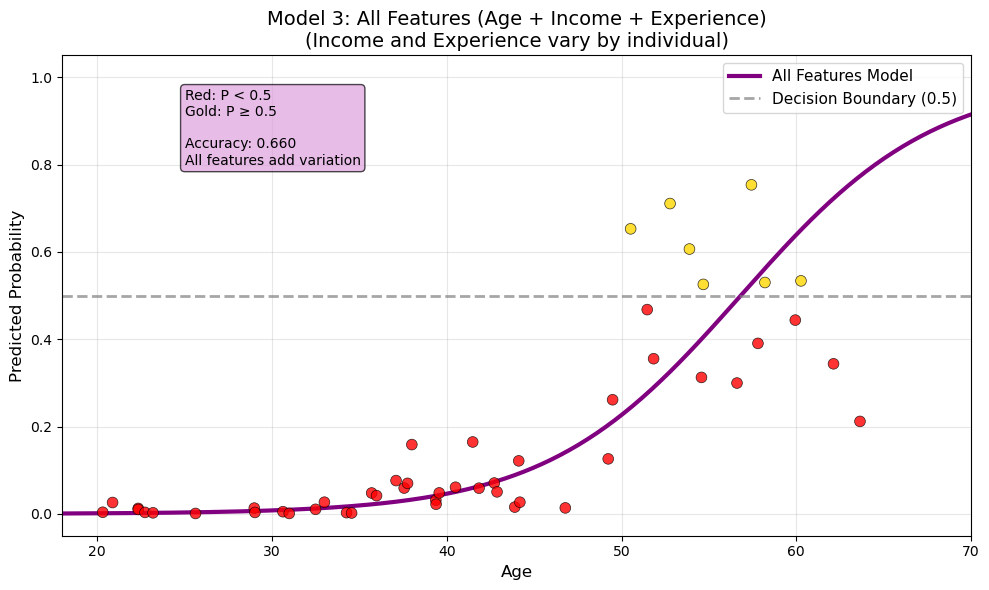

In [ ]:
# Model 3 Visualization: All Features (Age + Income + Experience)
plt.figure(figsize=(10, 6))

# Model 3: All features curve (using mean income and experience for the curve)
X_plot3 = np.column_stack((
    np.ones(200),
    age_range,
    np.full(200, df['Income'].mean()),      # Use mean income for the curve
    np.full(200, df['Experience'].mean())   # Use mean experience for the curve
))
prob_plot3 = sigmoid(X_plot3 @ w3)

plt.plot(age_range, prob_plot3, 'purple', linewidth=3, label='All Features Model')

# Color points based on their ACTUAL PROBABILITY (not outcome)
# Red for probabilities < 0.5, Yellow for probabilities >= 0.5
colors3 = ['red' if p < 0.5 else 'gold' for p in prob3.flatten()]
plt.scatter(df['Age'], prob3.flatten(), c=colors3, alpha=0.8, s=60, 
           edgecolors='black', linewidth=0.5, zorder=5)

# Decision boundary
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7, linewidth=2, label='Decision Boundary (0.5)')

plt.xlabel('Age', fontsize=12)
plt.ylabel('Predicted Probability', fontsize=12)
plt.title('Model 3: All Features (Age + Income + Experience)\n(Income and Experience vary by individual)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.ylim(-0.05, 1.05)
plt.xlim(18, 70)

# Add annotation
plt.text(25, 0.8, f'Red: P < 0.5\nGold: P ≥ 0.5\n\nAccuracy: {np.mean(pred3 == df["Purchased (y)"]):.3f}\nAll features add variation', 
         fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="plum", alpha=0.7))

plt.tight_layout()
plt.show()

### Gradient Descent Analysis for Model 3 (All Features)

For the full model, we optimize four weights: $w_0$ (bias), $w_{\text{age}}$, $w_{\text{income}}$, and $w_{\text{experience}}$. As with Model 2, we cannot visualize the 4D cost surface. Instead, we will track the cost reduction and weight convergence over iterations.



**1. Data Matrix ($X_{\text{model3}}$)**
The input matrix includes a bias column and all three features.

$$
X_{\text{model3}} =
\begin{bmatrix}
1 & \text{age}_1 & \text{income}_1 & \text{experience}_1 \\
1 & \text{age}_2 & \text{income}_2 & \text{experience}_2 \\
\vdots & \vdots & \vdots & \vdots \\
1 & \text{age}_n & \text{income}_n & \text{experience}_n
\end{bmatrix}_{n \times 4}
$$

**2. Weight Vector ($w_{\text{model3}}$)**
The weight vector contains four coefficients.

$$
w_{\text{model3}} =
\begin{bmatrix}
w_0 \\
w_{\text{age}} \\
w_{\text{income}} \\
w_{\text{experience}}
\end{bmatrix}_{4 \times 1}
$$

**3. Gradient and Weight Update**
The gradient and update rules remain the same, but are now applied to the 4x1 weight vector and n x 4 data matrix.

$$ \nabla_w L = \frac{1}{n} X_{\text{model3}}^T (\sigma(X_{\text{model3}}w_{\text{model3}}) - y) $$
$$ w_{\text{model3}} := w_{\text{model3}} - \alpha \nabla_w L $$

=== GRADIENT DESCENT RESULTS (MODEL 3) ===
Final Cost: 0.1114
Optimal Weights (w_bias, w_age, w_income, w_exp): [-0.08865415  5.14110435  0.23317451 -0.2403619 ]


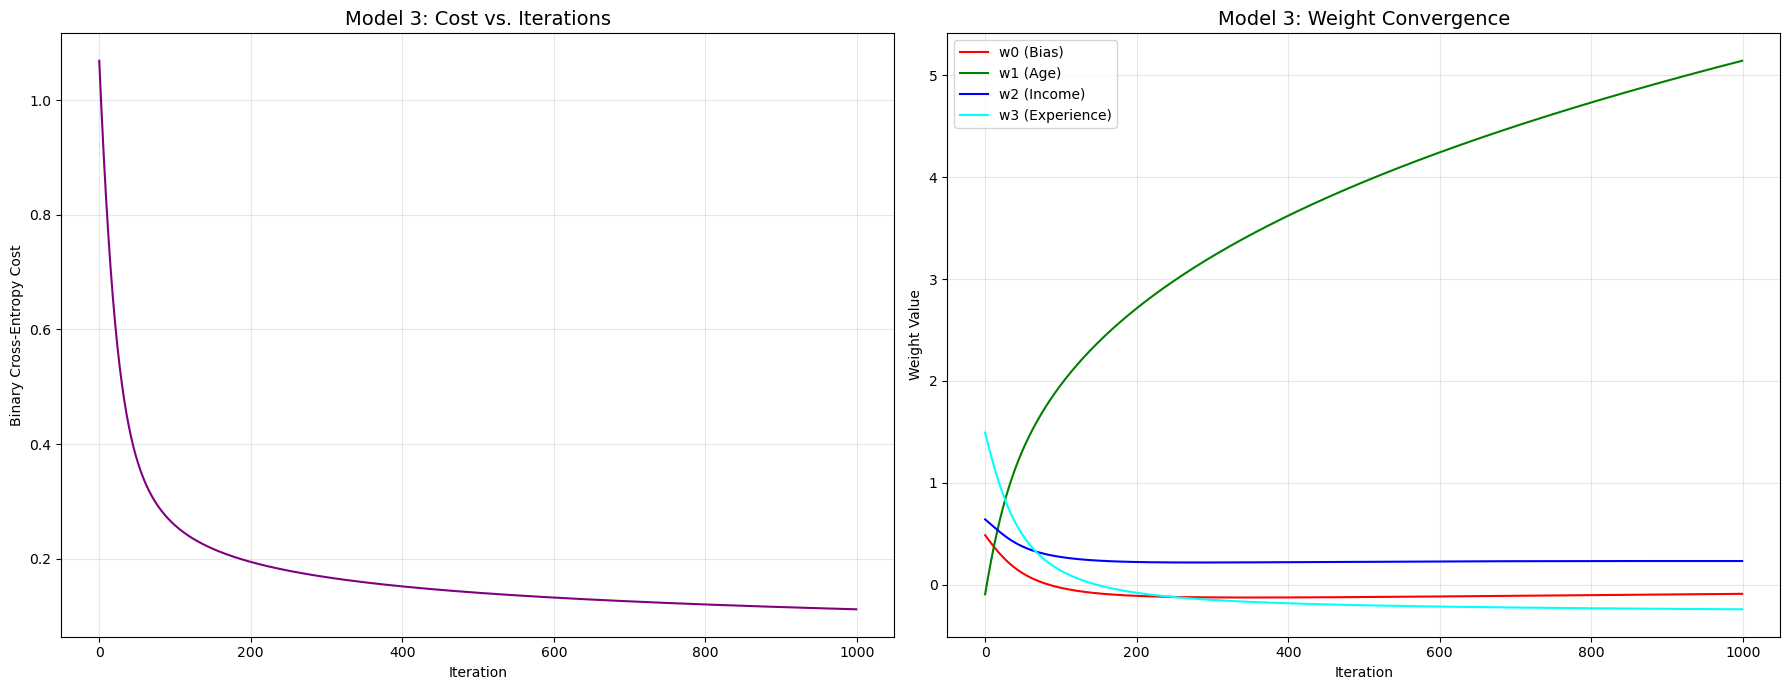

In [16]:
# Visualize Gradient Descent for Model 3 (All Features)

# Prepare data: Standardize all three features
scaler_m3 = StandardScaler()
X_model3_scaled = scaler_m3.fit_transform(df[['Age', 'Income', 'Experience']])

# Add bias term
X_b_m3 = np.c_[np.ones((len(X_model3_scaled), 1)), X_model3_scaled]
y_m3 = df[['Purchased (y)']].values

# --- Gradient Descent Implementation ---
learning_rate_m3 = 0.1
n_iterations_m3 = 1000

# Initialize weights
np.random.seed(42)
w_m3_gd = np.random.randn(4, 1)

# Store history
w_history_m3 = []
cost_history_m3 = []

for iteration in range(n_iterations_m3):
    y_pred = sigmoid(X_b_m3 @ w_m3_gd)
    gradient = 1/len(y_m3) * X_b_m3.T @ (y_pred - y_m3)
    w_m3_gd = w_m3_gd - learning_rate_m3 * gradient
    
    cost = calculate_cost(X_b_m3, y_m3, w_m3_gd)
    w_history_m3.append(w_m3_gd.flatten())
    cost_history_m3.append(cost)

w_history_m3 = np.array(w_history_m3)

print("=== GRADIENT DESCENT RESULTS (MODEL 3) ===")
print(f"Final Cost: {cost_history_m3[-1]:.4f}")
print(f"Optimal Weights (w_bias, w_age, w_income, w_exp): {w_m3_gd.flatten()}")

# --- Visualization ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# 1. Cost vs. Iterations
ax1.plot(range(n_iterations_m3), cost_history_m3, color='purple')
ax1.set_title('Model 3: Cost vs. Iterations', fontsize=14)
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Binary Cross-Entropy Cost')
ax1.grid(True, alpha=0.3)

# 2. Weight Convergence
ax2.plot(w_history_m3[:, 0], label='w0 (Bias)', color='red')
ax2.plot(w_history_m3[:, 1], label='w1 (Age)', color='green')
ax2.plot(w_history_m3[:, 2], label='w2 (Income)', color='blue')
ax2.plot(w_history_m3[:, 3], label='w3 (Experience)', color='cyan')
ax2.set_title('Model 3: Weight Convergence', fontsize=14)
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Weight Value')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [17]:
# Compare all models
print("=== MODEL COMPARISON SUMMARY ===")
print(f"Model 1 (Age only):        Accuracy = {np.mean(pred1 == df['Purchased (y)']):.3f}")
print(f"Model 2 (Age + Income):    Accuracy = {np.mean(pred2 == df['Purchased (y)']):.3f}")
print(f"Model 3 (All features):    Accuracy = {np.mean(pred3 == df['Purchased (y)']):.3f}")
print()
print("Feature importance ranking:")
print("1. Age (primary factor in all models)")
print("2. Experience (moderate effect)")
print("3. Income (smaller effect)")

# Create a detailed comparison table
print("=== DETAILED MODEL COMPARISON ===")
comparison_data = {
    'Model': ['Age Only', 'Age + Income', 'All Features'],
    'Features Used': ['Age', 'Age, Income', 'Age, Income, Experience'],
    'Age Coefficient': [w1_age, w2_age, w3_age],
    'Income Coefficient': [w1_income, w2_income, w3_income],
    'Experience Coefficient': [w1_experience, w2_experience, w3_experience],
    'Accuracy': [
        np.mean(pred1 == df['Purchased (y)']),
        np.mean(pred2 == df['Purchased (y)']),
        np.mean(pred3 == df['Purchased (y)'])
    ],
    'Predictions (Yes/Total)': [
        f"{sum(pred1)}/{len(pred1)}",
        f"{sum(pred2)}/{len(pred2)}",
        f"{sum(pred3)}/{len(pred3)}"
    ]
}

comparison_df = pd.DataFrame(comparison_data)

# Format the DataFrame for better display
comparison_df_display = comparison_df.copy()
comparison_df_display['Age Coefficient'] = comparison_df_display['Age Coefficient'].apply(lambda x: f"{x:.3f}")
comparison_df_display['Income Coefficient'] = comparison_df_display['Income Coefficient'].apply(lambda x: f"{x:.6f}")
comparison_df_display['Experience Coefficient'] = comparison_df_display['Experience Coefficient'].apply(lambda x: f"{x:.3f}")
comparison_df_display['Accuracy'] = comparison_df_display['Accuracy'].apply(lambda x: f"{x:.3f}")

# Display the DataFrame with proper formatting
display(comparison_df_display)

print("\n=== KEY INSIGHTS ===")
print("• Model complexity increases from left to right")
print("• Age coefficient decreases as more features are added")
print("• Additional features provide more nuanced predictions")
print("• Color coding: Red points have P < 0.5, Gold points have P ≥ 0.5")
print("• Decision boundary at P = 0.5 determines final classification")

# Count points by color for each model
red1 = sum(1 for p in prob1.flatten() if p < 0.5)
gold1 = sum(1 for p in prob1.flatten() if p >= 0.5)
red2 = sum(1 for p in prob2.flatten() if p < 0.5)
gold2 = sum(1 for p in prob2.flatten() if p >= 0.5)
red3 = sum(1 for p in prob3.flatten() if p < 0.5)
gold3 = sum(1 for p in prob3.flatten() if p >= 0.5)

print(f"\n=== POINT DISTRIBUTION ===")
print(f"Model 1: {red1} red points (P<0.5), {gold1} gold points (P≥0.5)")
print(f"Model 2: {red2} red points (P<0.5), {gold2} gold points (P≥0.5)")
print(f"Model 3: {red3} red points (P<0.5), {gold3} gold points (P≥0.5)")

=== MODEL COMPARISON SUMMARY ===
Model 1 (Age only):        Accuracy = 0.860
Model 2 (Age + Income):    Accuracy = 0.780
Model 3 (All features):    Accuracy = 0.660

Feature importance ranking:
1. Age (primary factor in all models)
2. Experience (moderate effect)
3. Income (smaller effect)
=== DETAILED MODEL COMPARISON ===


,Model,Features Used,Age Coefficient,Income Coefficient,Experience Coefficient,Accuracy,Predictions (Yes/Total)
0,Age Only,Age,0.250,0.000000,0.000,0.860,17/50
1,Age + Income,"Age, Income",0.200,0.000030,0.000,0.780,13/50
2,All Features,"Age, Income, Experience",0.180,0.000020,0.040,0.660,7/50



=== KEY INSIGHTS ===
• Model complexity increases from left to right
• Age coefficient decreases as more features are added
• Additional features provide more nuanced predictions
• Color coding: Red points have P < 0.5, Gold points have P ≥ 0.5
• Decision boundary at P = 0.5 determines final classification

=== POINT DISTRIBUTION ===
Model 1: 33 red points (P<0.5), 17 gold points (P≥0.5)
Model 2: 37 red points (P<0.5), 13 gold points (P≥0.5)
Model 3: 43 red points (P<0.5), 7 gold points (P≥0.5)


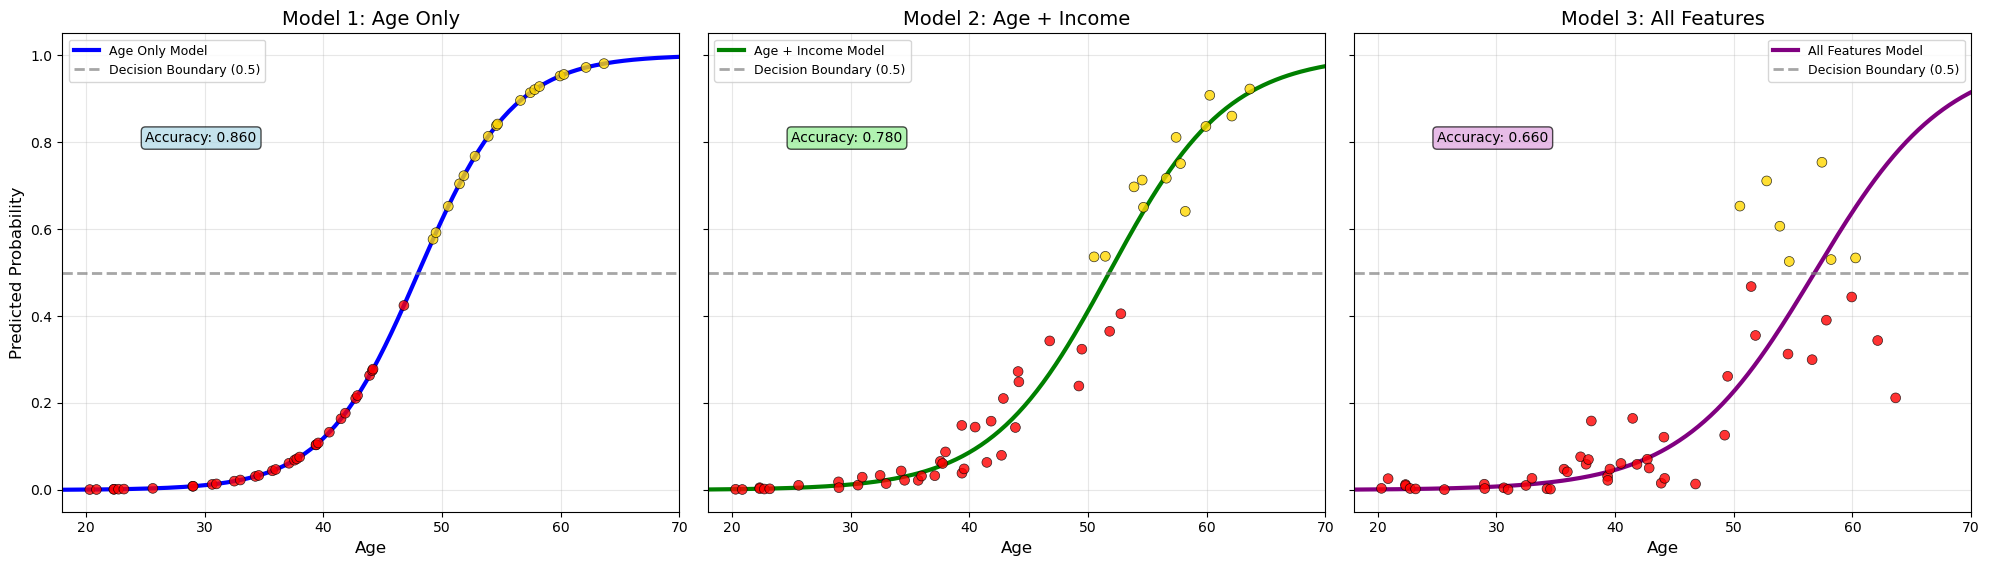

In [25]:
# compare all 3 models side-by-side
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Create age range for plotting curves
age_range = np.linspace(18, 70, 200)

# --- Model 1: Age Only ---
ax1 = axes[0]
X_plot1 = np.column_stack((
    np.ones(200),
    age_range,
    np.full(200, income_constant),
    np.full(200, experience_constant)
))
prob_plot1 = sigmoid(X_plot1 @ w1)
ax1.plot(age_range, prob_plot1, 'b-', linewidth=3, label='Age Only Model')
colors1 = ['red' if p < 0.5 else 'gold' for p in prob1.flatten()]
ax1.scatter(df['Age'], prob1.flatten(), c=colors1, alpha=0.8, s=50, 
            edgecolors='black', linewidth=0.5, zorder=5)
ax1.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7, linewidth=2, label='Decision Boundary (0.5)')
ax1.set_title('Model 1: Age Only', fontsize=14)
ax1.set_xlabel('Age', fontsize=12)
ax1.set_ylabel('Predicted Probability', fontsize=12)
ax1.text(25, 0.8, f'Accuracy: {np.mean(pred1 == df["Purchased (y)"]):.3f}', 
         fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))
ax1.legend(fontsize=9)

# --- Model 2: Age + Income ---
ax2 = axes[1]
X_plot2 = np.column_stack((
    np.ones(200),
    age_range,
    np.full(200, df['Income'].mean()),
    np.full(200, experience_constant)
))
prob_plot2 = sigmoid(X_plot2 @ w2)
ax2.plot(age_range, prob_plot2, 'g-', linewidth=3, label='Age + Income Model')
colors2 = ['red' if p < 0.5 else 'gold' for p in prob2.flatten()]
ax2.scatter(df['Age'], prob2.flatten(), c=colors2, alpha=0.8, s=50, 
            edgecolors='black', linewidth=0.5, zorder=5)
ax2.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7, linewidth=2, label='Decision Boundary (0.5)')
ax2.set_title('Model 2: Age + Income', fontsize=14)
ax2.set_xlabel('Age', fontsize=12)
ax2.text(25, 0.8, f'Accuracy: {np.mean(pred2 == df["Purchased (y)"]):.3f}', 
         fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7))
ax2.legend(fontsize=9)

# --- Model 3: All Features ---
ax3 = axes[2]
X_plot3 = np.column_stack((
    np.ones(200),
    age_range,
    np.full(200, df['Income'].mean()),
    np.full(200, df['Experience'].mean())
))
prob_plot3 = sigmoid(X_plot3 @ w3)
ax3.plot(age_range, prob_plot3, 'purple', linewidth=3, label='All Features Model')
colors3 = ['red' if p < 0.5 else 'gold' for p in prob3.flatten()]
ax3.scatter(df['Age'], prob3.flatten(), c=colors3, alpha=0.8, s=50, 
            edgecolors='black', linewidth=0.5, zorder=5)
ax3.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7, linewidth=2, label='Decision Boundary (0.5)')
ax3.set_title('Model 3: All Features', fontsize=14)
ax3.set_xlabel('Age', fontsize=12)
ax3.text(25, 0.8, f'Accuracy: {np.mean(pred3 == df["Purchased (y)"]):.3f}', 
         fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="plum", alpha=0.7))
ax3.legend(fontsize=9)

# General formatting for all subplots
for ax in axes:
    ax.grid(True, alpha=0.3)
    ax.set_ylim(-0.05, 1.05)
    ax.set_xlim(18, 70)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Real life example: Predicting the outcome of a potentially diabetic patient

The following plots visualize a separate logistic regression model for **each feature individually**. This is known as **univariate analysis**, where we examine the relationship between one independent variable and the outcome.

For each feature (e.g., `Glucose`), the matrix formulation is simplified as follows:

**1. Data Matrix ($X_j$)**

For a single feature $j$ (e.g., Glucose), we construct a matrix $X_j$ with two columns: one for the bias term (a column of 1s) and one for the feature values.

$$
X_j =
\begin{bmatrix}
1 & x_{1j} \\
1 & x_{2j} \\
\vdots & \vdots \\
1 & x_{nj}
\end{bmatrix}_{n \times 2}
$$

**2. Weight Vector ($w_j$)**

The corresponding weight vector has two components: the bias weight ($w_0$) and the feature weight ($w_j$).

$$
w_j =
\begin{bmatrix}
w_0 \\
w_j
\end{bmatrix}_{2 \times 1}
$$

**3. Linear Combination ($z_j$)**

The linear combination is computed using matrix multiplication, resulting in a score for each patient based on that single feature.

$$
z_j = X_j w_j =
\begin{bmatrix}
w_0 + w_j \cdot x_{1j} \\
w_0 + w_j \cdot x_{2j} \\
\vdots \\
w_0 + w_j \cdot x_{nj}
\end{bmatrix}_{n \times 1}
$$

**4. Predicted Probability ($\hat{y}_j$)**

Finally, the sigmoid function is applied to the linear combination vector $z_j$ to compute the predicted probability of having diabetes for each patient.

$$
\hat{y}_j = \sigma(z_j) = \frac{1}{1 + e^{-z_j}}
$$

This process is repeated for each feature, generating a unique sigmoid curve that shows how that specific feature influences the predicted outcome.

In [18]:
# Load the dataset
diabetes_df = pd.read_csv('../data/diabetes-dataset.csv')

# Display basic information about the dataset
print("Dataset Shape:", diabetes_df.shape)
print("\nAll 2000 rows of the diabetes dataset:")

# Display the dataset with nice formatting
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

diabetes_df



Dataset Shape: (2000, 9)

All 2000 rows of the diabetes dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
7,8,194,80,0,0,26.1,0.551,67,0
8,2,83,65,28,66,36.8,0.629,24,0
9,2,89,90,30,0,33.5,0.292,42,0


=== DIABETES DATASET LOGISTIC REGRESSION (UNIVARIATE VISUALIZATION) ===
Dataset size: 2000 patients
Features used: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

Outcome distribution:
  No Diabetes (0): 1316 patients (65.8%)
  Diabetes (1): 684 patients (34.2%)


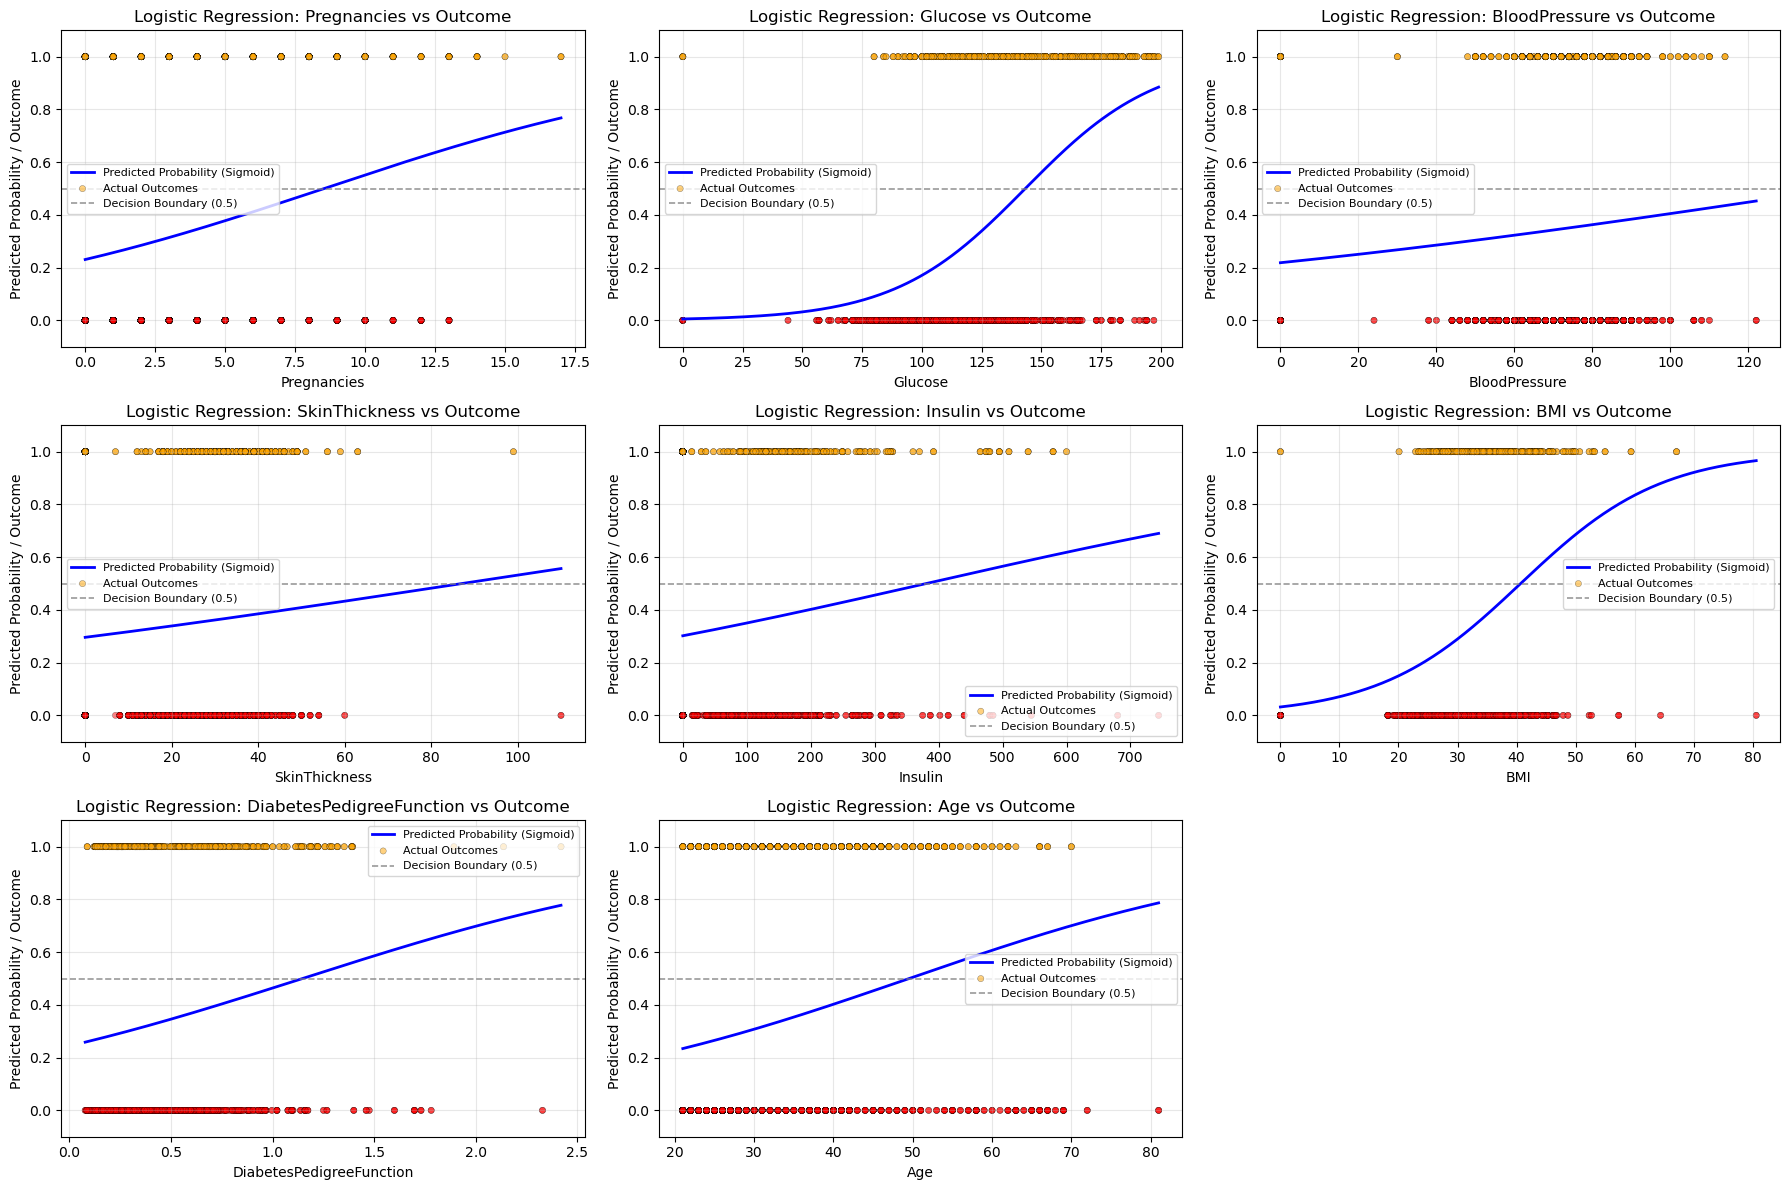

In [19]:

# === Prepare data ===
# Automatically select all numeric feature columns except Outcome
feature_names = [col for col in diabetes_df.columns if col != 'Outcome']

y_diabetes = diabetes_df['Outcome'].values

print("=== DIABETES DATASET LOGISTIC REGRESSION (UNIVARIATE VISUALIZATION) ===")
print(f"Dataset size: {len(diabetes_df)} patients")
print(f"Features used: {', '.join(feature_names)}")
print(f"\nOutcome distribution:")
print(f"  No Diabetes (0): {sum(y_diabetes == 0)} patients ({100*sum(y_diabetes == 0)/len(y_diabetes):.1f}%)")
print(f"  Diabetes (1): {sum(y_diabetes == 1)} patients ({100*sum(y_diabetes == 1)/len(y_diabetes):.1f}%)")

# === Plot logistic regression sigmoid curve for each feature individually ===
n_features = len(feature_names)
n_cols = 3
n_rows = int(np.ceil(n_features / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for idx, feature_name in enumerate(feature_names):
    ax = axes[idx]
    
    # Select single feature (reshape to 2D)
    X_feature = diabetes_df[[feature_name]].values

    # Standardize for numerical stability
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_feature)

    # Train logistic regression for this single feature
    lr = SklearnLogisticRegression(random_state=42, max_iter=1000)
    lr.fit(X_scaled, y_diabetes)

    # Sort for smooth plotting
    X_range = np.linspace(X_scaled.min(), X_scaled.max(), 300).reshape(-1, 1)
    y_proba = lr.predict_proba(X_range)[:, 1]

    # Inverse transform X_range back to original feature scale
    X_range_original = scaler.inverse_transform(X_range)

    # Plot sigmoid curve
    ax.plot(X_range_original, y_proba, color='blue', linewidth=2, label='Predicted Probability (Sigmoid)')

    # Plot actual outcomes
    colors = ['red' if y == 0 else 'orange' for y in y_diabetes]
    ax.scatter(X_feature, y_diabetes, c=colors, alpha=0.5, s=20, edgecolors='black', linewidth=0.3, label='Actual Outcomes')

    # Add decision boundary (prob = 0.5)
    ax.axhline(y=0.5, color='gray', linestyle='--', linewidth=1.2, alpha=0.8, label='Decision Boundary (0.5)')

    # Labels and titles
    ax.set_title(f'Logistic Regression: {feature_name} vs Outcome', fontsize=12)
    ax.set_xlabel(feature_name)
    ax.set_ylabel('Predicted Probability / Outcome')
    ax.set_ylim(-0.1, 1.1)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=8, loc='best')

# Remove unused subplots
for j in range(n_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()






### Analysis of Individual Features on Diabetes Outcome

Based on the univariate logistic regression plots above, we can analyze the predictive power of each feature individually. The steepness of the sigmoid curve and the separation of the outcome points (red for 'No Diabetes', orange for 'Diabetes') indicate how strongly a single feature correlates with the outcome.



#### Detailed Feature Analysis

*   **Glucose:**
    *   **Observation:** This plot shows a very steep and well-defined S-curve. There is a clear and strong separation between non-diabetic and diabetic patients as glucose levels rise. The transition from a low probability to a high probability of diabetes occurs over a relatively narrow range of glucose values (approximately 100 to 140 mg/dL).
    *   **Conclusion:** **Glucose is overwhelmingly the most significant predictor of diabetes.** A high glucose level is strongly indicative of a positive diabetes outcome.

*   **BMI (Body Mass Index):**
    *   **Observation:** The curve shows a clear positive correlation; as BMI increases, so does the probability of having diabetes. The curve is noticeably sloped, but less steep than the Glucose curve. There is considerable overlap between diabetic and non-diabetic individuals, especially at lower BMI values.
    *   **Conclusion:** BMI is a **moderately strong predictor**. While not as definitive as Glucose, it is still a very important risk factor.

*   **Age:**
    *   **Observation:** Similar to BMI, there is a distinct positive trend where older age is associated with a higher probability of diabetes. The S-curve is evident, showing that risk increases significantly after the age of 30. However, there is still a lot of overlap, meaning many younger people have diabetes and many older people do not.
    *   **Conclusion:** Age is another **moderately strong predictor**, ranking similarly to BMI in terms of importance.

*   **Pregnancies:**
    *   **Observation:** The sigmoid curve shows a slight positive trend, suggesting that a higher number of pregnancies is associated with a slightly increased risk. However, the curve is very shallow, and there is a massive overlap of outcomes across all values.
    *   **Conclusion:** The number of pregnancies is a **weak predictor** on its own.

*   **Diabetes Pedigree Function:**
    *   **Observation:** This feature, representing genetic predisposition, shows a positive but very gentle slope. Higher values are linked to a slightly higher probability, but the effect is weak, and the data points overlap significantly.
    *   **Conclusion:** This is also a **weak predictor**.

*   **Blood Pressure, Skin Thickness, and Insulin:**
    *   **Observation:** For these three features, the sigmoid curves are nearly flat. There is almost no change in the predicted probability of diabetes as the values of these features increase. The red (non-diabetic) and orange (diabetic) points are heavily intermixed with no clear pattern. The `Insulin` and `SkinThickness` plots are further complicated by a large number of zero values, which may be missing data.
    *   **Conclusion:** When considered individually, **Blood Pressure, Skin Thickness, and Insulin are very weak or insignificant predictors** in this dataset.

### Conclusion: Feature Importance Ranking

Based on this univariate analysis, the features can be ranked by their individual predictive power as follows:

1.  **Most Important:** **Glucose**
2.  **Moderately Important:** **BMI** and **Age**
3.  **Weakly Important:** **Pregnancies** and **DiabetesPedigreeFunction**
4.  **Least Important:** **BloodPressure**, **SkinThickness**, and **Insulin**